In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
data = load_breast_cancer()

In [48]:
feature_names = data.feature_names
df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
drop_list1 = ['target']
x_1 = df.drop(drop_list1,axis = 1)

In [5]:
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini',  random_state=42)

In [9]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [10]:
rf_predictions = rf_model.predict(X_test_scaled)

In [11]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

In [12]:
evaluate_model(y_test, rf_predictions, "Random Forest")


Random Forest Performance:
Accuracy: 0.9708
Precision: 0.9640
Recall: 0.9907
F1-Score: 0.9772

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.94      0.96        63
   Malignant       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [13]:
feature_importance = pd.DataFrame({
    'Feature': x_1.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 5 Most Important Features (Random Forest):")
print(feature_importance.head())


Top 5 Most Important Features (Random Forest):
                 Feature  Importance
7    mean concave points    0.141934
27  worst concave points    0.127136
23            worst area    0.118217
6         mean concavity    0.080557
20          worst radius    0.077975


# Validation Curve

In [14]:
from sklearn.model_selection import validation_curve

In [15]:
param_range = [10, 50, 100, 150, 200]
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train_scaled, y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [16]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

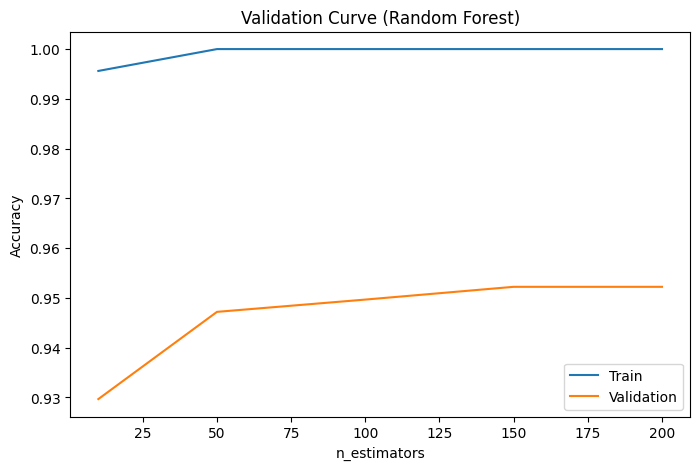

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label="Train")
plt.plot(param_range, test_mean, label="Validation")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Validation Curve (Random Forest)")
plt.legend()
plt.show()

# Learning Curve

In [18]:
from sklearn.model_selection import learning_curve

In [19]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1
)

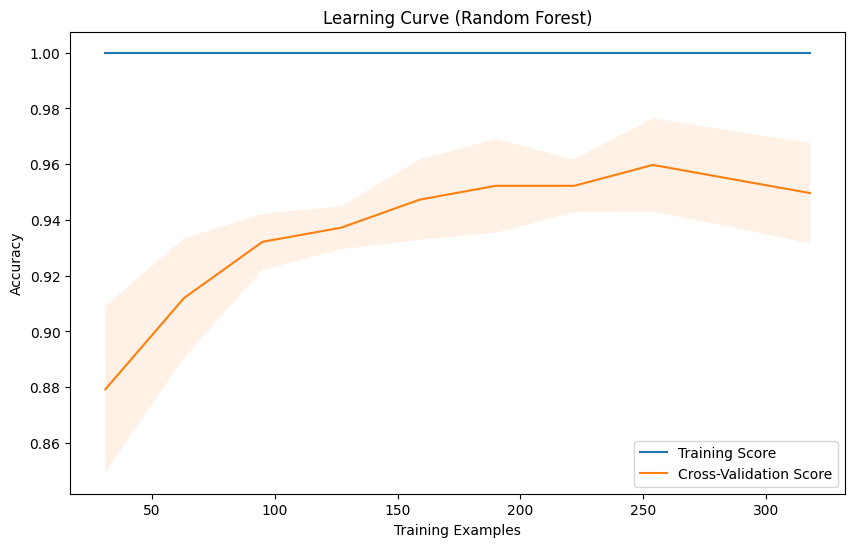

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1)
plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                 test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.1)
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

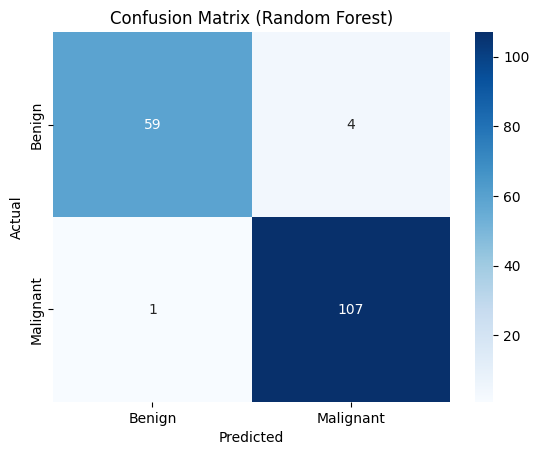

In [22]:
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC and AUC Curve

In [23]:
from sklearn.metrics import roc_curve, auc

In [24]:
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

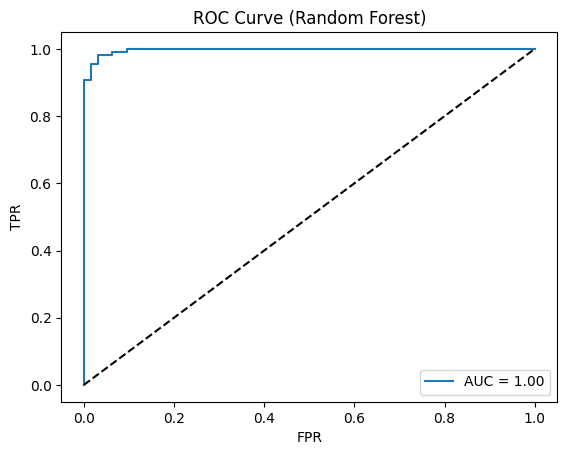

In [25]:
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve (Random Forest)')
plt.legend()
plt.show()

# Precision-Recall Curve

In [26]:
from sklearn.metrics import precision_recall_curve

In [27]:
precision, recall, _ = precision_recall_curve(y_test, rf_probs)

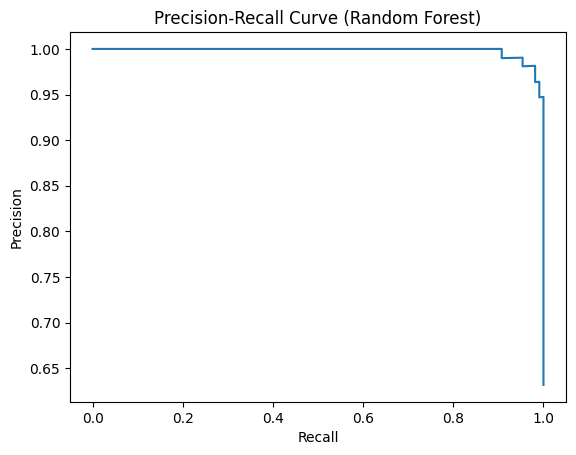

In [28]:
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.show()

# Permutation Importance

In [29]:
from sklearn.inspection import permutation_importance

In [30]:
perm_result = permutation_importance(rf_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_result.importances_mean.argsort()

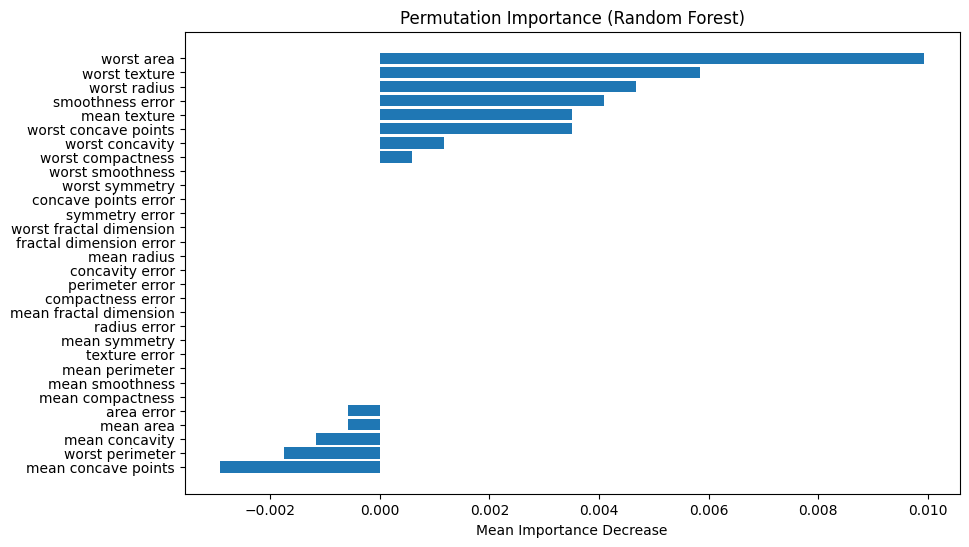

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], perm_result.importances_mean[sorted_idx])
plt.title("Permutation Importance (Random Forest)")
plt.xlabel("Mean Importance Decrease")
plt.show()

# Random Forest Tree Visualization (3 trees)

In [32]:
from sklearn.tree import plot_tree

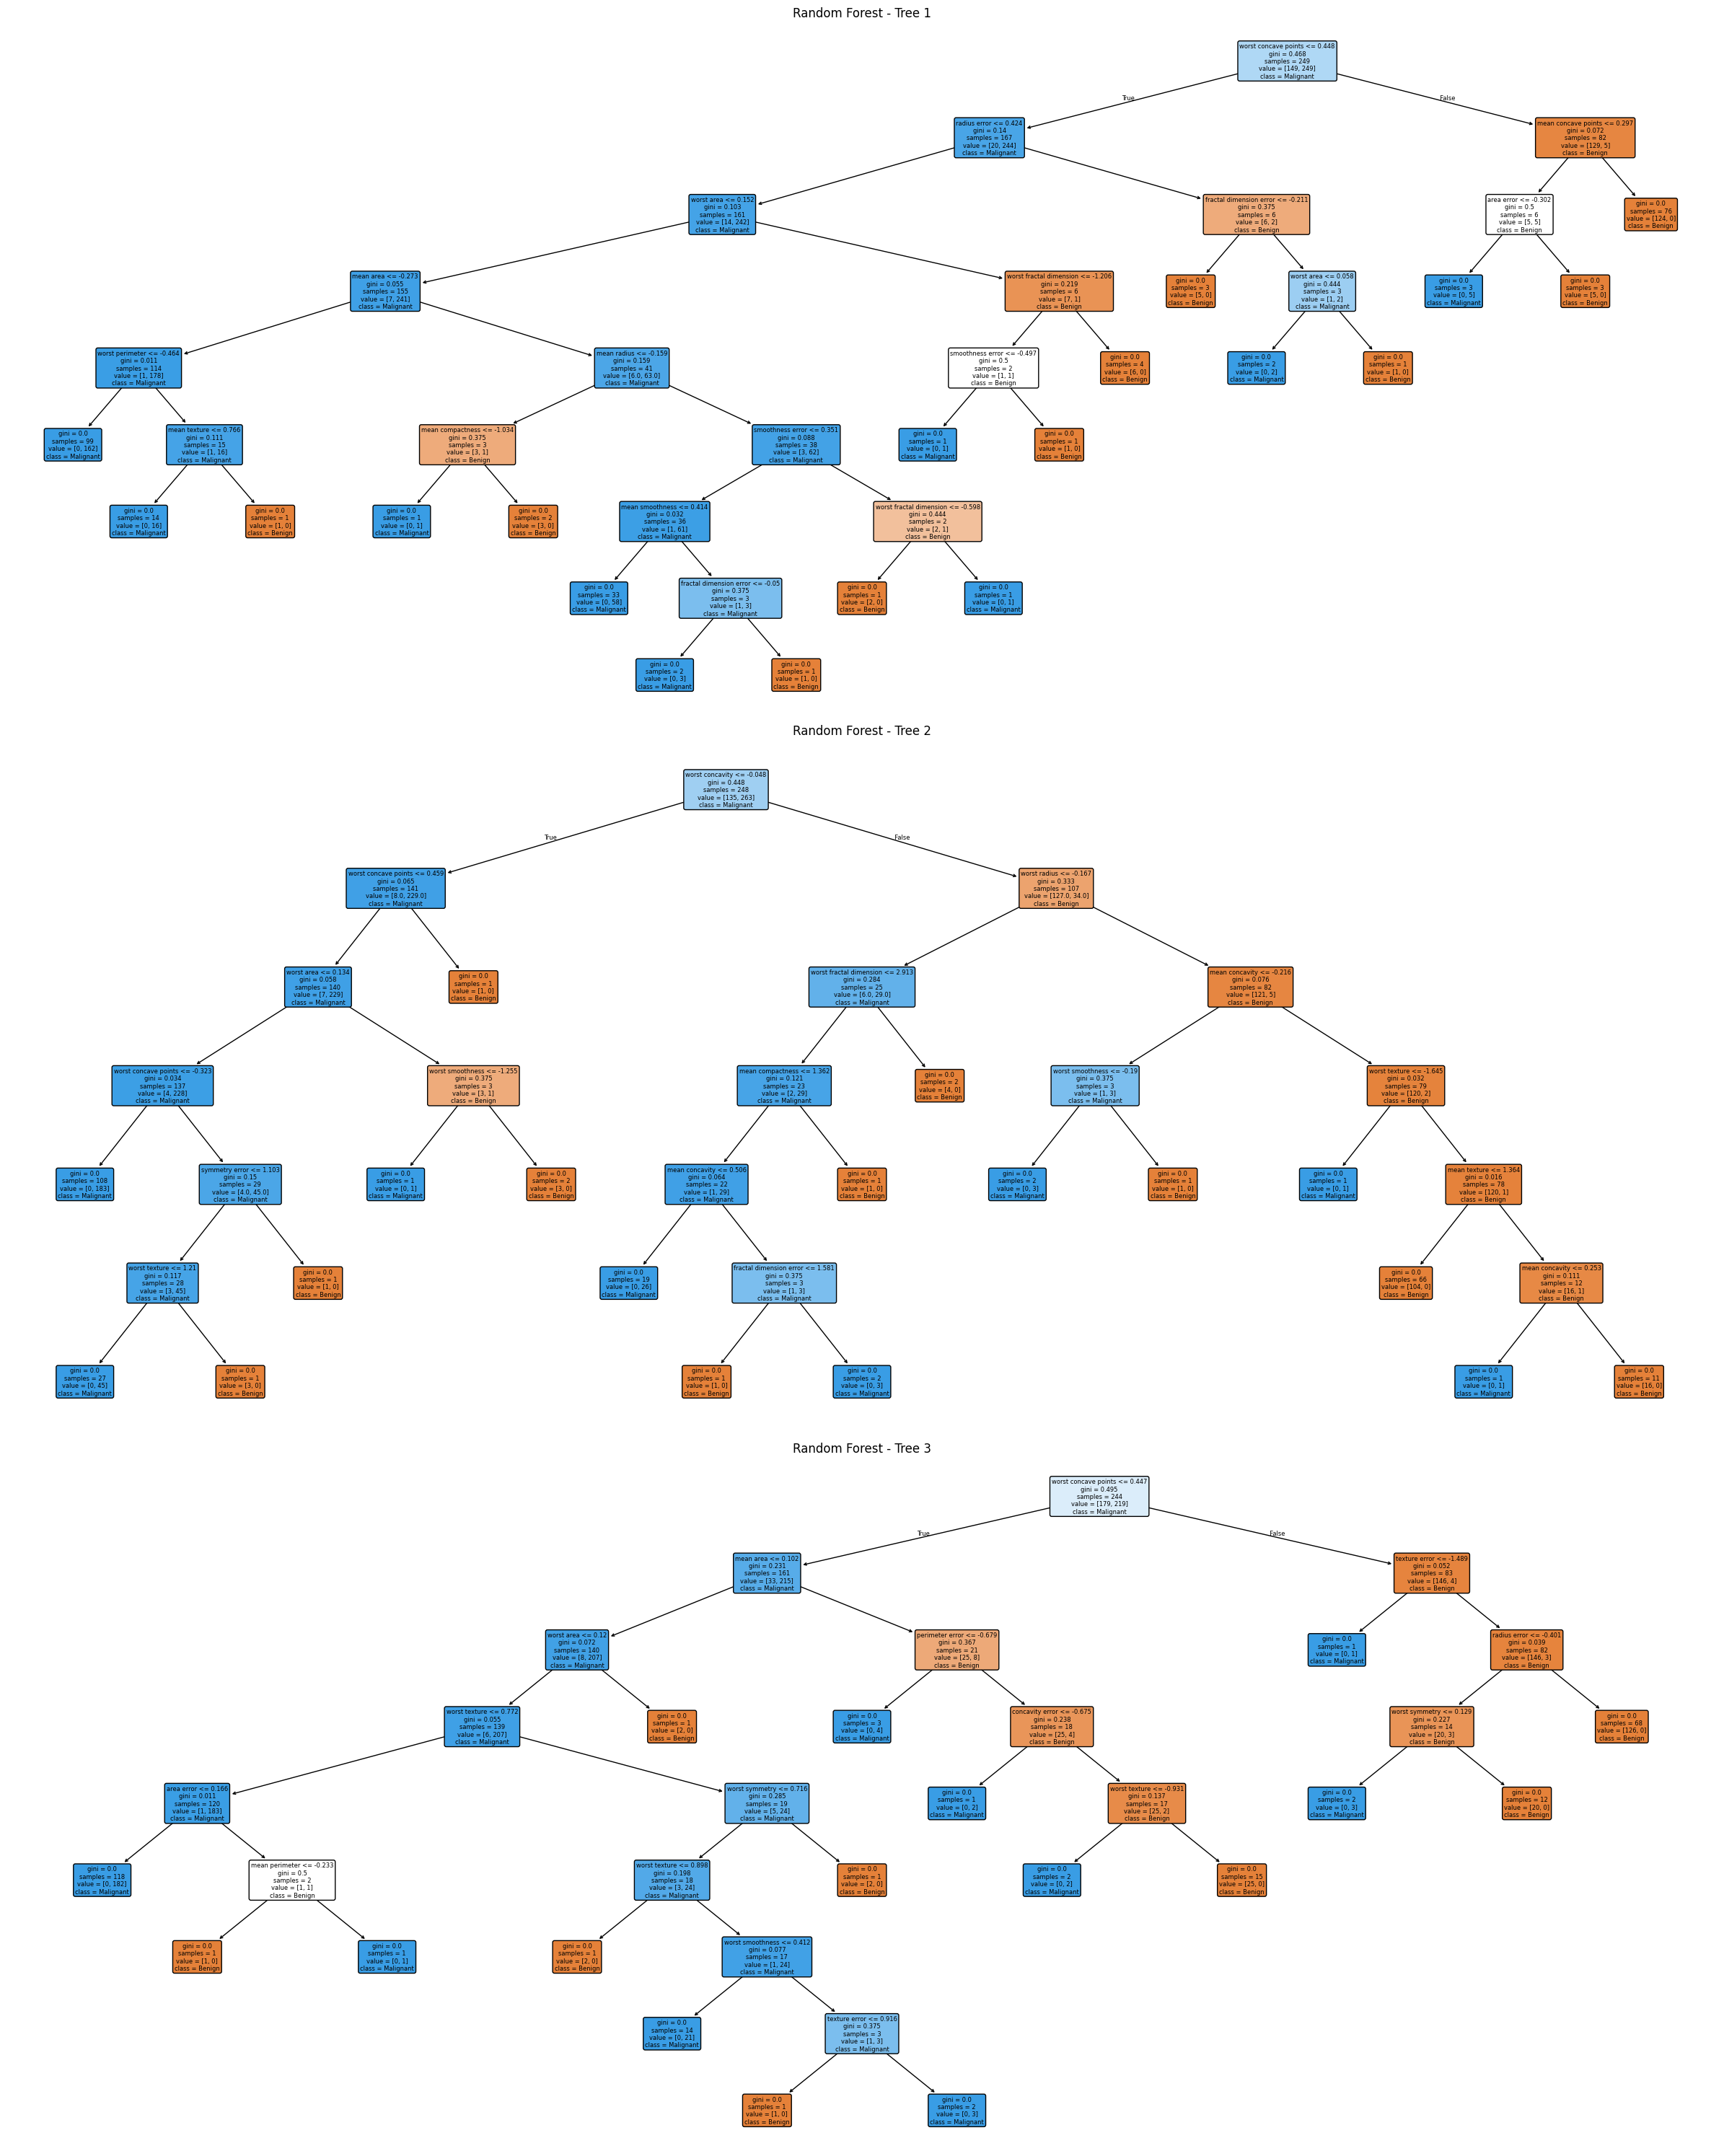

In [33]:
plt.figure(figsize=(24, 30))

for i in range(3):
    plt.subplot(3, 1, i + 1)
    plot_tree(rf_model.estimators_[i],
              feature_names=feature_names,
              class_names=['Benign', 'Malignant'],
              filled=True,
              rounded=True,
              fontsize=6)
    plt.title(f"Random Forest - Tree {i+1}")

plt.tight_layout()
plt.show()

# Average Decrease in Impurity (Gini/Entropy)

In [34]:
impurity_importance = rf_model.feature_importances_

In [35]:
sorted_idx = np.argsort(impurity_importance)[::-1]
sorted_importances = impurity_importance[sorted_idx]
sorted_features = feature_names[sorted_idx]

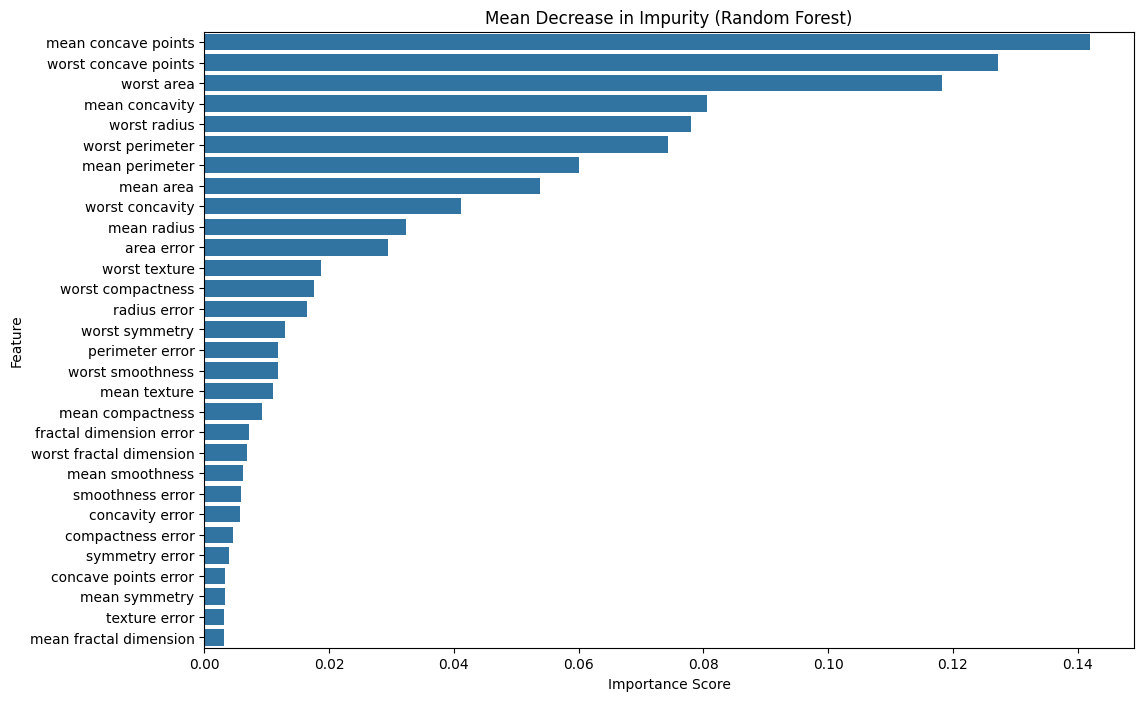

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title("Mean Decrease in Impurity (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ELI5

In [37]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.1 MB/s eta 0:00:00


In [38]:
import eli5
from eli5.sklearn import PermutationImportance

In [39]:
perm = PermutationImportance(rf_model, random_state=42).fit(X_test_scaled, y_test)
explanation = eli5.explain_weights(perm, feature_names=feature_names)

In [40]:
eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.0070 ± 0.0201,worst area
0.0058 ± 0.0074,worst texture
0.0047 ± 0.0047,mean texture
0.0035 ± 0.0057,smoothness error
0.0035 ± 0.0119,worst concave points
0.0035 ± 0.0057,area error
0.0012 ± 0.0047,worst radius
0 ± 0.0000,radius error
0 ± 0.0000,worst symmetry
0 ± 0.0000,worst fractal dimension


# LIME

In [41]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2df7cf6622a84c2aea59660ffe114edf482269756cdd74423897c58f8fb84307
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [42]:
import lime
import lime.lime_tabular

In [43]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=feature_names,
    class_names=['Benign', 'Malignant'],
    mode='classification'
)

In [44]:
i = 1
lime_exp = lime_explainer.explain_instance(X_test_scaled[i], rf_model.predict_proba, num_features=10)
lime_exp.show_in_notebook(show_table=True)

# SHAP

In [45]:
import shap

In [47]:
shap_explainer = shap.Explainer(rf_model, X_train_scaled)
shap_values = shap_explainer(X_test_scaled)

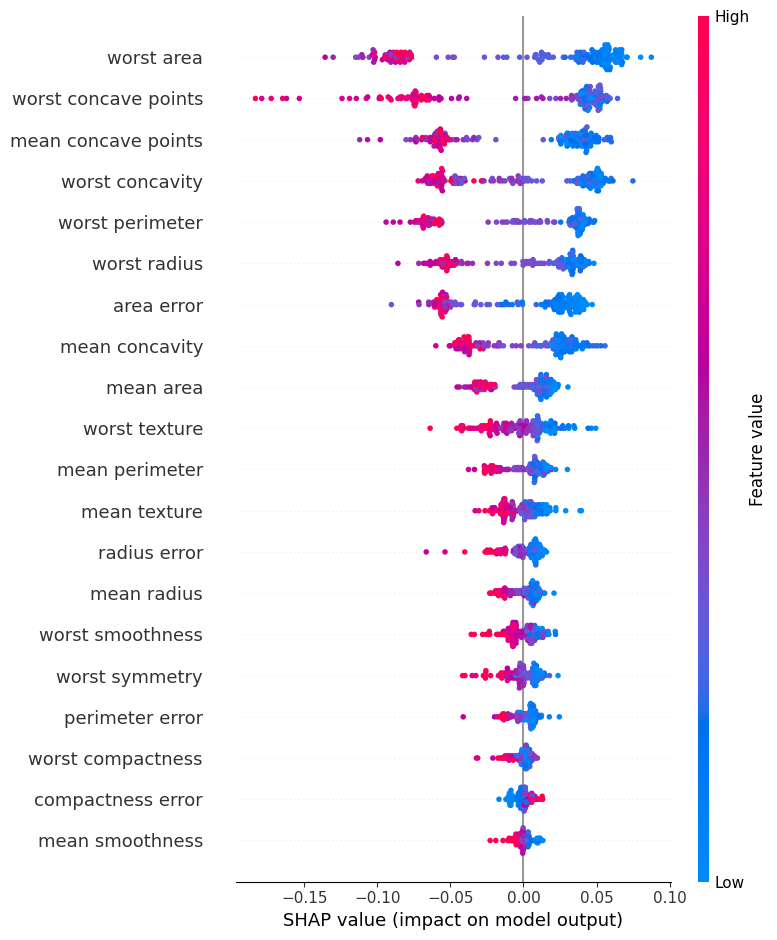

In [51]:
plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=feature_names, show=True)
plt.show()

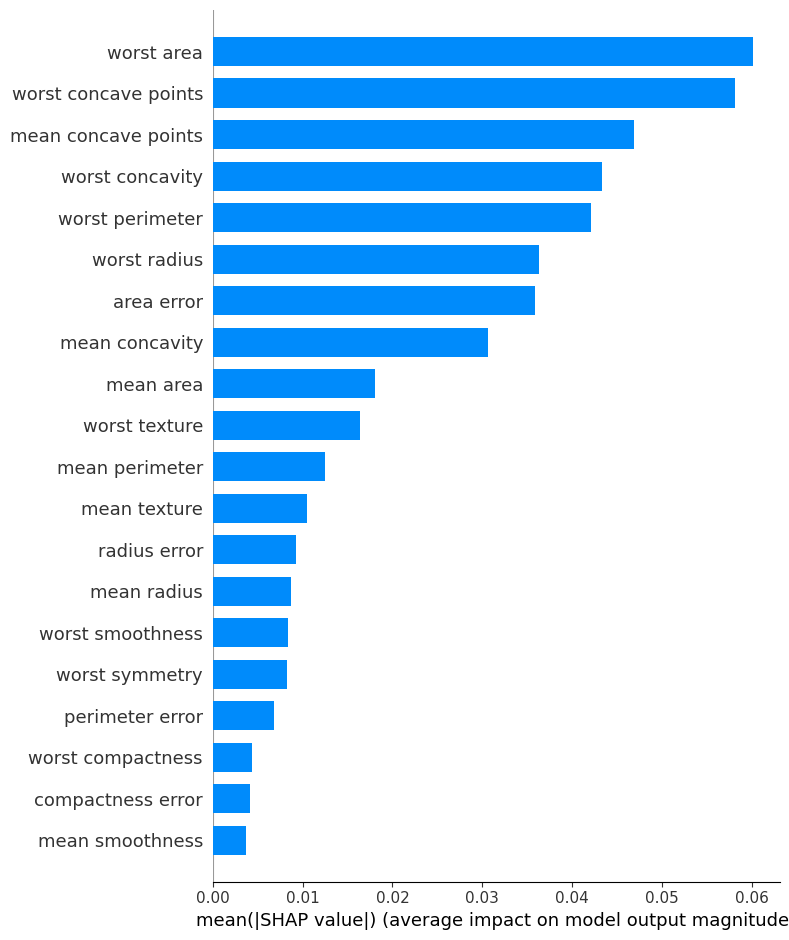

In [54]:
plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=feature_names, plot_type="bar", show=True)
plt.close()

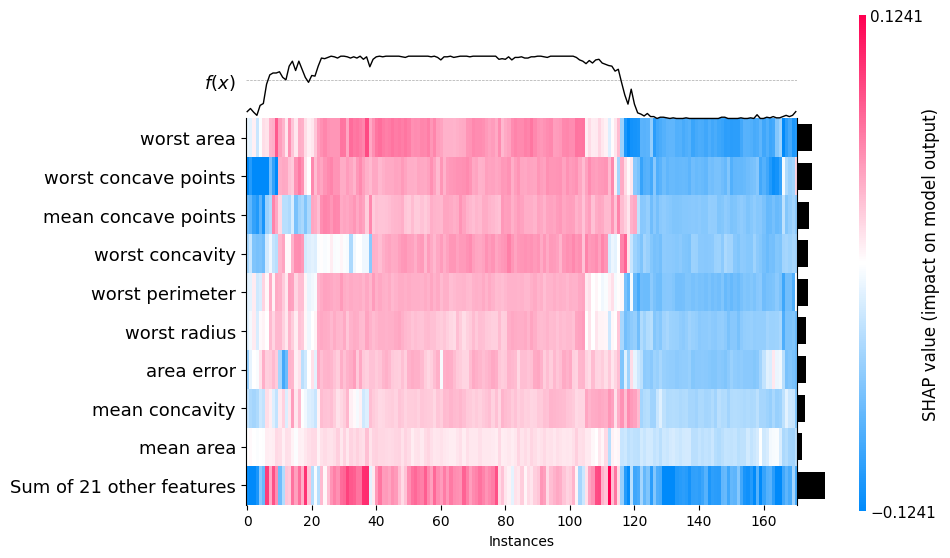

<Axes: xlabel='Instances'>

In [55]:
shap_values_class_1 = shap_values[:, :, 1]

explanation = shap.Explanation(values=shap_values_class_1,
                                 base_values=None,
                                 data=X_test,
                                 feature_names=feature_names)

shap.plots.heatmap(explanation)